IMPORTS BEFORE RUNNING CODE BELOW

In [1]:
import tensorflow.keras.datasets as datasets
import matplotlib.pyplot as plt
from skimage.feature import hog
import linear_models.softmaxreg as softmaxreg
import umap
import numpy as np
import metrics.metrics as metrics

2023-04-15 02:03:34.527407: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-15 02:03:37.526774: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-15 02:03:37.528816: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-15 02:03:46.344261: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/codespace/.python/current/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


TRAINING MODEL USING THE IMAGES

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
print ('{} {}'.format(x_train.shape, x_train.dtype))
print ('{} {}'.format(x_test.shape, x_train.dtype))
digit = x_train[0,:,:]
print(digit.shape)

(60000, 28, 28) uint8
(10000, 28, 28) uint8
(28, 28)


In [3]:
#normalizamos/estandarizamos los datos
x_train_std = (x_train - x_train.mean()) / x_train.std()
x_test_std = (x_test - x_test.mean()) / x_test.std()

In [4]:
x_train_d_784 = x_train_std.reshape(60000,-1)
x_test_d_784 = x_test_std.reshape(10000,-1)

In [5]:
SM = softmaxreg.SoftmaxReg(10)

In [6]:
coeff = SM.fit(x_train_d_784, y_train)

it 0 acc 0.11948333333333333
it 10 acc 0.19048333333333334
it 20 acc 0.3181833333333333
it 30 acc 0.4313166666666667
it 40 acc 0.5140666666666667
it 50 acc 0.5750666666666666
it 60 acc 0.6180666666666667
it 70 acc 0.6512
it 80 acc 0.6772166666666667
it 90 acc 0.69815
it 100 acc 0.7146833333333333
it 110 acc 0.7277666666666667
it 120 acc 0.7393166666666666
it 130 acc 0.7490166666666667
it 140 acc 0.75845
it 150 acc 0.7667666666666667
it 160 acc 0.7731666666666667
it 170 acc 0.7793833333333333
it 180 acc 0.7853833333333333
it 190 acc 0.7901833333333333


In [7]:
y_pred = SM.predict(x_test_d_784)

In [8]:
acc = metrics.multiclass_accuracy(y_test, y_pred)
print(f"Accuracy: {acc}")

Accuracy: 0.8037


In [9]:
cm = metrics.confusion_matrix(y_test, y_pred, 10)
print(f'Confusion Matrix\n{cm}')

Confusion Matrix
[[ 867    0   16    5    3   34   35    3   14    3]
 [   0 1085    9    7    3    5    3    0   23    0]
 [  23   21  786   49   23   15   25   28   47   15]
 [  18    1   27  818    5   66   14   11   35   15]
 [   4    4   15    5  783   10   26   26   10   99]
 [  35   14   15   99   34  563   22   20   64   26]
 [  27   10   26    2   23   31  821    3    8    7]
 [   4   25   30    9   14    3    2  846   13   82]
 [  11   20   47   47   20   80   19   20  691   19]
 [  13    8    7   12   87   31    5   48   21  777]]


UMAP
(60000, 2)


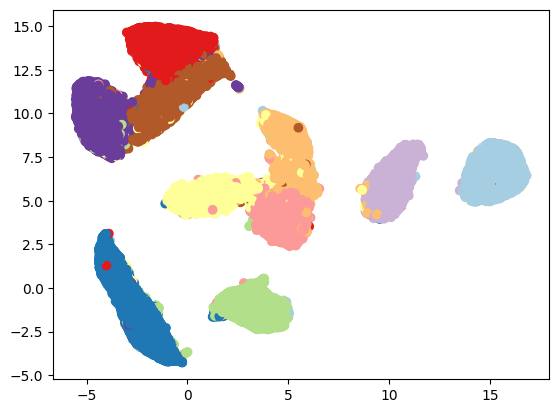

In [10]:
#2d visualization
reducer = umap.UMAP()
print('UMAP', flush = True)
reducer.fit(x_train_d_784) 
embedding = reducer.transform(x_train_d_784)
print(embedding.shape)
plt.scatter(embedding[:, 0], embedding[:, 1], c=y_train, cmap='Paired')
plt.show()

TRAINING MODEL USING HOG FUNCTION

In [7]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
print ('{} {}'.format(x_train.shape, x_train.dtype))
print ('{} {}'.format(x_test.shape, x_train.dtype))
digit = x_train[0,:,:]
print(digit.shape)

(60000, 28, 28) uint8
(10000, 28, 28) uint8
(28, 28)


In [8]:
#normalizamos/estandarizamos los datos
x_train_std = (x_train - x_train.mean()) / x_train.std()
x_test_std = (x_test - x_test.mean()) / x_test.std()
print(x_test_std.shape)
print(x_train_std.shape)

(10000, 28, 28)
(60000, 28, 28)


In [9]:
SM = softmaxreg.SoftmaxReg(10)

In [10]:
x_train_hog = list()
for n in range(len(x_train_std)):
    digit = x_train_std[n,:,:]
    fd = hog(digit, orientations=8, pixels_per_cell=(7,7), cells_per_block=(1, 1), visualize=False)
    x_train_hog.append(fd)
    if(n%9999 == 0): print(f"{round(n/len(x_train_std)*100)}%")
x_train_hog = np.array(x_train_hog)

0%
17%
33%
50%
67%
83%
100%


In [11]:
x_test_hog = list()
for n in range(len(x_test_std)):
    digit = x_test_std[n,:,:]
    fd = hog(digit, orientations=8, pixels_per_cell=(7,7), cells_per_block=(1, 1), visualize=False)
    x_test_hog.append(fd)
    if(n%999 == 0): print(f"{round(n/len(x_test_std)*100)}%")
x_test_hog = np.array(x_test_hog)

0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
100%


In [12]:
coeff = SM.fit(x_train_hog, y_train)
y_pred = SM.predict(x_test_hog)

it 0 acc 0.07471666666666667
it 10 acc 0.07788333333333333
it 20 acc 0.0824
it 30 acc 0.08735
it 40 acc 0.09291666666666666
it 50 acc 0.0996
it 60 acc 0.10725
it 70 acc 0.11563333333333334
it 80 acc 0.12515
it 90 acc 0.13631666666666667
it 100 acc 0.14805
it 110 acc 0.1607
it 120 acc 0.1752
it 130 acc 0.19011666666666666
it 140 acc 0.20646666666666666
it 150 acc 0.2245
it 160 acc 0.24215
it 170 acc 0.26108333333333333
it 180 acc 0.28158333333333335
it 190 acc 0.30106666666666665


In [17]:
acc = metrics.multiclass_accuracy(y_test, y_pred)
print(f"Accuracy: {acc}")

Accuracy: 0.3134


In [18]:
cm = metrics.confusion_matrix(y_test, y_pred, 10)
print(f'Confusion Matrix\n{cm}')

Confusion Matrix
[[583  32 113 107   1  82  40   1  21   0]
 [ 33 477  42  20  44  68  66   5 121 259]
 [111   7 510 346   5  12  13   7  12   9]
 [122   2 388 411   2  27   9  28   5  16]
 [135  67  99  35 254  75  89  57  73  98]
 [ 65   8  93 238  35 231 163  13  28  18]
 [144  94 342 190   7  34 111   2  30   4]
 [166  21  44  48 121 148  24 142  25 289]
 [126 124 151 298  22  44  27  34 101  47]
 [152  90  44  26  62 118  17 114  72 314]]


UMAP
(60000, 2)


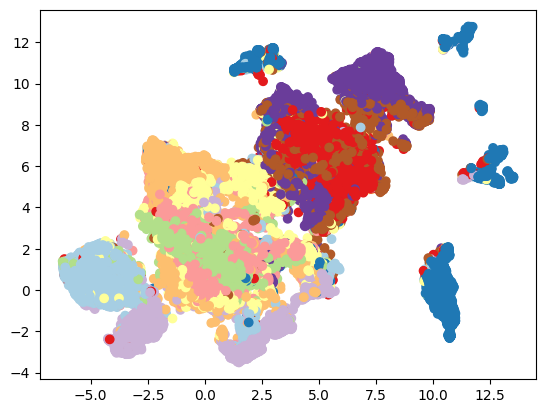

In [19]:
#2d visualization
reducer = umap.UMAP()
print('UMAP', flush = True)
reducer.fit(x_train_hog) 
embedding = reducer.transform(x_train_hog)
print(embedding.shape)
plt.scatter(embedding[:, 0], embedding[:, 1], c=y_train, cmap='Paired')
plt.show()